In [ ]:
Q3. Implement AdaBoost algorithm using python to answer any specific classification problem.

In [15]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [16]:

# HELPER FUNCTION: GET ERROR RATE
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

# HELPER FUNCTION: PRINT ERROR RATE
def print_error_rate(err):
    print('Error rate: Training: %.4f - Test: %.4f' % err)

# HELPER FUNCTION: GENERIC CLASSIFIER
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test), pred_train, pred_test

# ADABOOST IMPLEMENTATION
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    w = np.ones(n_train) / n_train  # Initialize weights
    pred_train, pred_test = np.zeros(n_train), np.zeros(n_test)
    
    for i in range(M):
        clf.fit(X_train, Y_train, sample_weight=w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        miss = [int(x) for x in (pred_train_i != Y_train)]
        miss2 = [x if x == 1 else -1 for x in miss]
        err_m = np.dot(w, miss) / sum(w)
        alpha_m = 0.5 * np.log((1 - err_m) / float(err_m))
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        pred_train = [sum(x) for x in zip(pred_train, [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, [x * alpha_m for x in pred_test_i])]

    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test), pred_train, pred_test

# PLOT FUNCTION
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth=3, figsize=(8, 6), color=['lightblue', 'darkblue'], grid=True)
    plot1.set_xlabel('Number of iterations', fontsize=12)
    plot1.set_xticklabels(range(0, 450, 50))
    plot1.set_ylabel('Error rate', fontsize=12)
    plot1.set_title('Error rate vs number of iterations', fontsize=16)
    plt.axhline(y=er_test[0], linewidth=1, color='red', ls='dashed')



Simple Decision Tree Classifier Performance Metrics:
Training Error Rate: 0.4482
Test Error Rate: 0.4512

Training Set Metrics:
              precision    recall  f1-score   support

        -1.0       0.53      0.95      0.68      4789
         1.0       0.75      0.16      0.26      4811

    accuracy                           0.55      9600
   macro avg       0.64      0.55      0.47      9600
weighted avg       0.64      0.55      0.47      9600


Test Set Metrics:
              precision    recall  f1-score   support

        -1.0       0.53      0.95      0.68      1206
         1.0       0.74      0.14      0.24      1194

    accuracy                           0.55      2400
   macro avg       0.63      0.55      0.46      2400
weighted avg       0.63      0.55      0.46      2400







------------------------------------------------------------------
------------------------------------------------------------------

Adaboost Classifier Performance Metrics:
Training Error Ra

/var/folders/f_/kssdbwf16h521ndyz_g4zct00000gn/T/ipykernel_19557/1242137676.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(range(0, 450, 50))


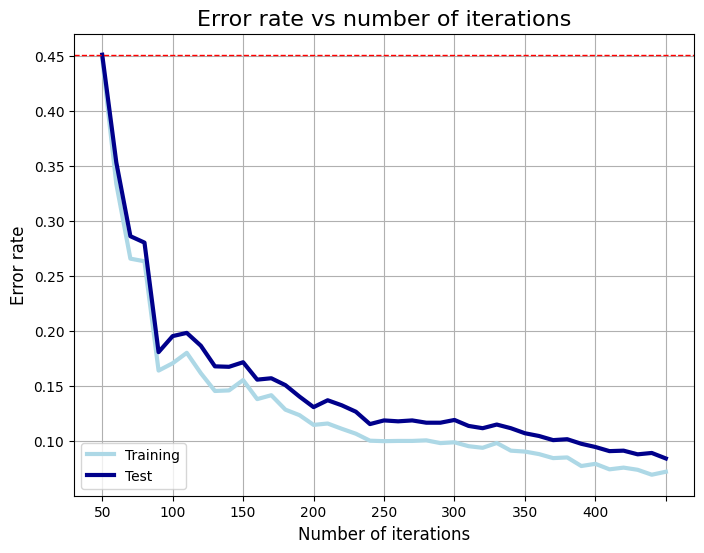

In [18]:
# MAIN SCRIPT
if __name__ == '__main__':
    # Generate synthetic dataset
    X, y = make_hastie_10_2()
    irisDF = pd.DataFrame(X)
    irisDF['Y'] = y

    # Split into training and test set
    train, test = train_test_split(irisDF, test_size=0.2)
    X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
    X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]
    
    # Fit a simple decision tree first
    clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)
    er_tree, er_test_tree, pred_train_tree, pred_test_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
    
    # Print performance metrics for the simple decision tree
    print("Simple Decision Tree Classifier Performance Metrics:")
    print(f"Training Error Rate: {er_tree:.4f}")
    print(f"Test Error Rate: {er_test_tree:.4f}")
    print("\nTraining Set Metrics:")
    print(classification_report(Y_train, pred_train_tree))
    print("\nTest Set Metrics:")
    print(classification_report(Y_test, pred_test_tree))

    for _ in range(3):
        print("\n")

    print("------------------------------------------------------------------")
    print("------------------------------------------------------------------")
    

    # Fit Adaboost classifier using a decision tree as base estimator
    er_train, er_test = [er_tree], [er_test_tree]
    x_range = range(10, 410, 10)
    for i in x_range:    
        er_i, er_test_i, pred_train_i, pred_test_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
        er_train.append(er_i)
        er_test.append(er_test_i)
    
    # Print performance metrics for the Adaboost model
    print("\nAdaboost Classifier Performance Metrics:")
    print(f"Training Error Rate: {er_train[-1]:.4f}")
    print(f"Test Error Rate: {er_test[-1]:.4f}")
    print("\nTraining Set Metrics:")
    print(classification_report(Y_train, pred_train_i))
    print("\nTest Set Metrics:")
    print(classification_report(Y_test, pred_test_i))
    
    # Compare error rate vs number of iterations
    plot_error_rate(er_train, er_test)
    

In [ ]:
we can observe that the accuarcy and the precision of the simple decision tree has increased after applying adaboost

What adaboost algorithm does is that it builds a model and gives equal weights to all the data points. 

It then assigns higher weights to points that are wrongly classified. Now all the points with higher weights 
    
are given more importance in the next model. It will keep training models until and unless a lower error is received.